In [33]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px
import yfinance as yf
import numpy as np #The Numpy numerical computing library
import pandas as pd #The Pandas data science library
import requests #The requests library for HTTP requests in Python
import xlsxwriter #The XlsxWriter libarary for 
import math #The Python math module

stocks = pd.read_csv('sp_500_stocks.csv')
list_stocks = [stocks["Ticker"][i] for i in range(0,505)]

In [41]:
# Get Apple's stock data from yahoo finance
stocks_data = yf.download(list_stocks, start="2020-01-01", end="2023-01-01")

print(stocks_data.head())

[*********************100%***********************]  505 of 505 completed

47 Failed downloads:
['ATVI', 'GPS', 'FLT', 'PBCT', 'CTL', 'FBHS', 'RE', 'NLOK', 'BRK.B', 'DISH', 'CTXS', 'DRE', 'NLSN', 'FLIR', 'VIAC', 'KSU', 'WLTW', 'TWTR', 'WRK', 'PKI', 'FRC', 'DISCA', 'ANTM', 'ABMD', 'VAR', 'MYL', 'MXIM', 'NBL', 'ALXN', 'ABC', 'HFC', 'FB', 'SIVB', 'CXO', 'PEAK', 'ETFC', 'DISCK', 'CERN', 'TIF', 'PXD', 'COG', 'XLNX', 'BLL']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
['INFO', 'FISV', 'LB']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-01-01 -> 2023-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1577854800, endDate = 1672549200")')
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-01-01 -> 2023-01-01)')


Price       Adj Close                                                        \
Ticker              A        AAL         AAP       AAPL       ABBV ABC ABMD   
Date                                                                          
2020-01-02  83.214874  28.982893  144.599106  72.796021  72.264885 NaN  NaN   
2020-01-03  81.878799  27.548195  144.608124  72.088287  71.578941 NaN  NaN   
2020-01-06  82.120834  27.219410  142.231537  72.662697  72.143845 NaN  NaN   
2020-01-07  82.372566  27.119778  140.544373  72.320976  71.732277 NaN  NaN   
2020-01-08  83.185806  27.737495  138.929764  73.484344  72.240654 NaN  NaN   

Price                                          ... Volume                     \
Ticker            ABT         ACN        ADBE  ...   XLNX       XOM     XRAY   
Date                                           ...                             
2020-01-02  79.689941  195.263565  334.429993  ...    NaN  12456400  1556600   
2020-01-03  78.718460  194.938385  331.809998  

In [43]:
# Create an empty DataFrame to store the data
columns = ['Ticker', 'Price', 'Market Cap', 'Daily Returns']
final_df = pd.DataFrame(columns=columns)

# Retrieve the stock data using yfinance
for ticker in list_stocks:
    stock = yf.Ticker(ticker)
    info = stock.info  # Get info dictionary for the stock
    
    # Extract required data
    price = info.get('regularMarketPrice')
    market_cap = info.get('marketCap')
    
    # Retrieve historical data for daily returns
    historical_data = stock.history(period="1d", start="2023-01-01", end="2023-12-31")
    daily_returns = historical_data['Close'].pct_change().mean()  # Average daily return
    
    # Create a DataFrame for the current stock and concatenate it to final_df
    stock_df = pd.DataFrame([{
        'Ticker': ticker,
        'Price': price,
        'Market Cap': market_cap,
        'Daily Returns': daily_returns
    }])
    final_df = pd.concat([final_df, stock_df], ignore_index=True)

# Display the final DataFrame
print(final_df)

C:\Users\oguzo\AppData\Local\Temp\ipykernel_26508\55581235.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([final_df, stock_df], ignore_index=True)
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ABC?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ABC&crumb=lhL6a%2FAxN0T
$ABC: possibly delisted; no timezone found
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/ABMD?modules=financialData%2CquoteType%2CdefaultKeyStatistics%2CassetProfile%2CsummaryDetail&corsDomain=finance.yahoo.com&formatted=false&symbol=ABMD&crumb=lhL6a%2FAxN0T
$ABMD

    Ticker Price     Market Cap  Daily Returns
0        A  None    39807238144      -0.000135
1      AAL  None     9600684032       0.000549
2      AAP  None     2544689664      -0.002958
3     AAPL  None  3621594333184       0.001835
4     ABBV  None   321213038592       0.000048
..     ...   ...            ...            ...
500    YUM  None    38799380480       0.000242
501    ZBH  None    21997676544      -0.000065
502   ZBRA  None    21149863936       0.000541
503   ZION  None     8850843648       0.000639
504    ZTS  None    79770484736       0.001347

[505 rows x 4 columns]


In [46]:
final_df

,Ticker,Price,Market Cap,Daily Returns
0,A,None,39807238144,-0.000135
1,AAL,None,9600684032,0.000549
2,AAP,None,2544689664,-0.002958
3,AAPL,None,3621594333184,0.001835
4,ABBV,None,321213038592,0.000048
...,...,...,...,...
500,YUM,None,38799380480,0.000242
501,ZBH,None,21997676544,-0.000065
502,ZBRA,None,21149863936,0.000541
503,ZION,None,8850843648,0.000639


In [47]:
import yfinance as yf

# Kospi Endeksi
kospi = yf.Ticker("^KS11")
kospi_data = kospi.history(period="1y")  # Son 1 yıllık veri
print(kospi_data)
kospi_data.to_csv("kospi_data.csv")  # CSV olarak kaydetme


Failed to get ticker '^KS11' reason: HTTPSConnectionPool(host='query2.finance.yahoo.com', port=443): Read timed out. (read timeout=10)


                                  Open         High          Low        Close  \
Date                                                                            
2023-12-04 00:00:00+09:00  2522.219971  2525.629883  2510.520020  2514.949951   
2023-12-05 00:00:00+09:00  2507.449951  2509.739990  2492.550049  2494.280029   
2023-12-06 00:00:00+09:00  2503.570068  2509.669922  2495.379883  2495.379883   
2023-12-07 00:00:00+09:00  2493.139893  2499.729980  2481.000000  2492.070068   
2023-12-08 00:00:00+09:00  2510.239990  2521.580078  2507.139893  2517.850098   
...                                ...          ...          ...          ...   
2024-11-28 00:00:00+09:00  2499.689941  2513.629883  2495.639893  2504.669922   
2024-11-29 00:00:00+09:00  2496.929932  2496.929932  2446.959961  2455.909912   
2024-12-02 00:00:00+09:00  2479.020020  2483.290039  2448.449951  2454.479980   
2024-12-03 00:00:00+09:00  2472.060059  2500.669922  2471.550049  2500.100098   
2024-12-04 00:00:00+09:00  2

In [48]:
kospi_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-04 00:00:00+09:00,2522.219971,2525.629883,2510.520020,2514.949951,498900,0.0,0.0
2023-12-05 00:00:00+09:00,2507.449951,2509.739990,2492.550049,2494.280029,427100,0.0,0.0
2023-12-06 00:00:00+09:00,2503.570068,2509.669922,2495.379883,2495.379883,391000,0.0,0.0
2023-12-07 00:00:00+09:00,2493.139893,2499.729980,2481.000000,2492.070068,446900,0.0,0.0
2023-12-08 00:00:00+09:00,2510.239990,2521.580078,2507.139893,2517.850098,431800,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-28 00:00:00+09:00,2499.689941,2513.629883,2495.639893,2504.669922,342600,0.0,0.0
2024-11-29 00:00:00+09:00,2496.929932,2496.929932,2446.959961,2455.909912,384300,0.0,0.0
2024-12-02 00:00:00+09:00,2479.020020,2483.290039,2448.449951,2454.479980,328100,0.0,0.0


In [49]:
# Samsung Electronics
samsung = yf.Ticker("005930.KQ")  # Samsung'un borsa kodu
samsung_data = samsung.history(period="1y")
print(samsung_data)
samsung_data.to_csv("samsung_data.csv")

# SK Hynix
sk_hynix = yf.Ticker("000660.KQ")
sk_hynix_data = sk_hynix.history(period="1y")
print(sk_hynix_data)
sk_hynix_data.to_csv("sk_hynix_data.csv")


                                   Open          High           Low  \
Date                                                                  
2023-12-04 00:00:00+09:00  71408.184143  71506.272308  71015.831482   
2023-12-05 00:00:00+09:00  70917.735319  71015.823473  69838.765625   
2023-12-06 00:00:00+09:00  70427.299098  70721.563579  70231.122777   
2023-12-07 00:00:00+09:00  70427.295717  70525.383872  69740.678628   
2023-12-08 00:00:00+09:00  70721.566987  71408.184143  70525.390657   
...                                 ...           ...           ...   
2024-11-27 00:00:00+09:00  57700.000000  57800.000000  56000.000000   
2024-11-28 00:00:00+09:00  56000.000000  56400.000000  55200.000000   
2024-11-29 00:00:00+09:00  55100.000000  55300.000000  53800.000000   
2024-12-02 00:00:00+09:00  54300.000000  54400.000000  53100.000000   
2024-12-03 00:00:00+09:00  53100.000000  54400.000000  53100.000000   

                                  Close    Volume  Dividends  Stock Splits  

In [50]:
# Güney Kore Wonu / ABD Doları Döviz Kuru
krw_usd = yf.Ticker("KRW=X")
krw_usd_data = krw_usd.history(period="1y")
print(krw_usd_data)
krw_usd_data.to_csv("krw_usd_data.csv")


                                  Open         High          Low        Close  \
Date                                                                            
2023-12-04 00:00:00+00:00  1299.189941  1311.000000  1293.010010  1299.189941   
2023-12-05 00:00:00+00:00  1307.800049  1317.739990  1307.760010  1307.800049   
2023-12-06 00:00:00+00:00  1313.369995  1315.469971  1309.569946  1313.369995   
2023-12-07 00:00:00+00:00  1313.719971  1327.050049  1311.939941  1313.719971   
2023-12-08 00:00:00+00:00  1312.760010  1318.579956  1290.459961  1312.760010   
...                                ...          ...          ...          ...   
2024-11-28 00:00:00+00:00  1388.469971  1397.569946  1388.469971  1388.469971   
2024-11-29 00:00:00+00:00  1393.300049  1398.500000  1389.650024  1393.300049   
2024-12-02 00:00:00+00:00  1399.859985  1407.050049  1397.949951  1399.859985   
2024-12-03 00:00:00+00:00  1401.060059  1442.209961  1375.040039  1401.060059   
2024-12-04 00:00:00+00:00  1

In [51]:
# Güney Kore 10 Yıllık Devlet Tahvili Faiz Oranı
korea_bond = yf.Ticker("^KS10")
korea_bond_data = korea_bond.history(period="1y")
print(korea_bond_data)
korea_bond_data.to_csv("korea_bond_data.csv")
 

Failed to get ticker '^KS10' reason: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
$^KS10: possibly delisted; no price data found  (period=1y)


Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [52]:
import yfinance as yf

# Kospi Endeksi Verileri
kospi = yf.Ticker("^KS11")
kospi_data = kospi.history(period="1d")  # Günlük veri
print("Kospi Endeksi:", kospi_data)
kospi_data.to_csv("kospi_data_daily.csv")

# KRW/USD Döviz Kuru Verileri
krw_usd = yf.Ticker("KRW=X")
krw_usd_data = krw_usd.history(period="1d")  # Günlük veri
print("KRW/USD Döviz Kuru:", krw_usd_data)
krw_usd_data.to_csv("krw_usd_daily.csv")

# Samsung Electronics Hisse Verileri
samsung = yf.Ticker("005930.KQ")
samsung_data = samsung.history(period="1d")  # Günlük veri
print("Samsung Electronics:", samsung_data)
samsung_data.to_csv("samsung_daily.csv")

# SK Hynix Hisse Verileri
sk_hynix = yf.Ticker("000660.KQ")
sk_hynix_data = sk_hynix.history(period="1d")  # Günlük veri
print("SK Hynix:", sk_hynix_data)
sk_hynix_data.to_csv("sk_hynix_daily.csv")

# MSCI Güney Kore Endeksi
msci_korea = yf.Ticker("EWY")
msci_korea_data = msci_korea.history(period="1d")  # Günlük veri
print("MSCI Güney Kore Endeksi:", msci_korea_data)
msci_korea_data.to_csv("msci_korea_daily.csv")


Kospi Endeksi:                                  Open         High          Low   Close  \
Date                                                                      
2024-12-04 00:00:00+09:00  2450.76001  2483.040039  2442.459961  2464.0   

                           Volume  Dividends  Stock Splits  
Date                                                        
2024-12-04 00:00:00+09:00  670284        0.0           0.0  
KRW/USD Döviz Kuru:                                   Open         High      Low        Close  \
Date                                                                        
2024-12-04 00:00:00+00:00  1414.839966  1417.439941  1405.75  1416.050049   

                           Volume  Dividends  Stock Splits  
Date                                                        
2024-12-04 00:00:00+00:00       0        0.0           0.0  


$005930.KQ: possibly delisted; no price data found  (period=1d)
$000660.KQ: possibly delisted; no price data found  (period=1d)


Samsung Electronics: Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
SK Hynix: Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []
MSCI Güney Kore Endeksi:                                 Open       High    Low      Close    Volume  \
Date                                                                          
2024-12-03 00:00:00-05:00  54.580002  56.049999  52.68  55.810001  43580900   

                           Dividends  Stock Splits  Capital Gains  
Date                                                               
2024-12-03 00:00:00-05:00        0.0           0.0            0.0  


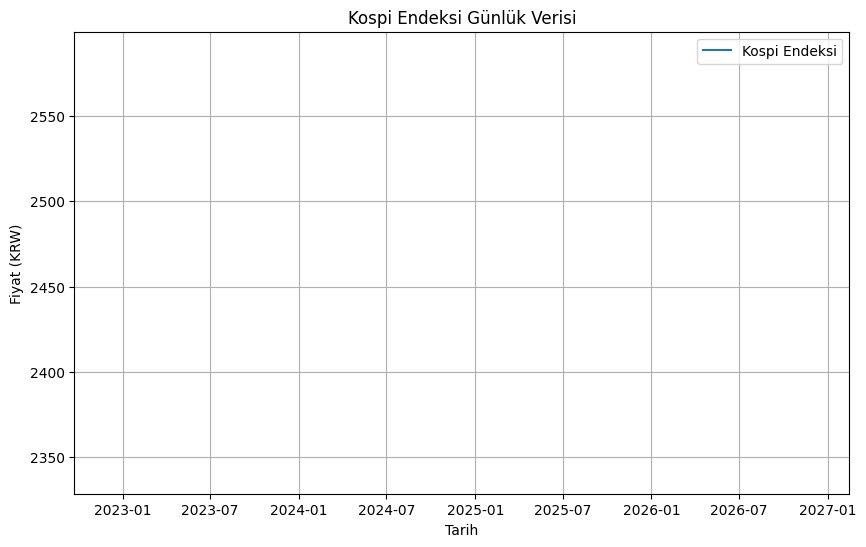

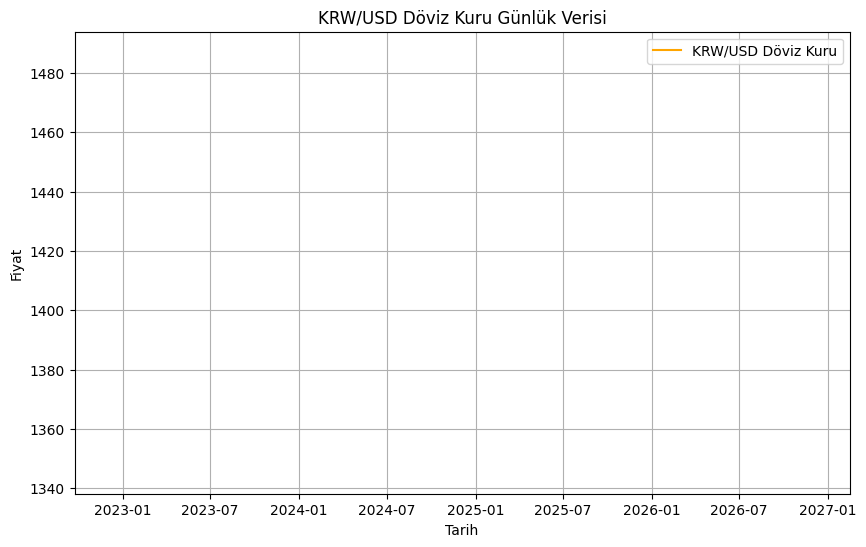

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Kospi Endeksi Verilerini Yükle
kospi_data = pd.read_csv("kospi_data_daily.csv", index_col="Date", parse_dates=True)

# Kospi Endeksi Grafiği
plt.figure(figsize=(10,6))
plt.plot(kospi_data.index, kospi_data["Close"], label="Kospi Endeksi")
plt.title("Kospi Endeksi Günlük Verisi")
plt.xlabel("Tarih")
plt.ylabel("Fiyat (KRW)")
plt.legend()
plt.grid(True)
plt.show()

# KRW/USD Döviz Kuru Verisini Yükle
krw_usd_data = pd.read_csv("krw_usd_daily.csv", index_col="Date", parse_dates=True)

# KRW/USD Döviz Kuru Grafiği
plt.figure(figsize=(10,6))
plt.plot(krw_usd_data.index, krw_usd_data["Close"], label="KRW/USD Döviz Kuru", color="orange")
plt.title("KRW/USD Döviz Kuru Günlük Verisi")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.legend()
plt.grid(True)
plt.show()


005930.KQ: Period '2d' is invalid, must be one of ['1mo', '3mo', '6mo', 'ytd', '1y', '2y', '5y', '10y', 'max']
000660.KQ: Period '2d' is invalid, must be one of ['1mo', '3mo', '6mo', 'ytd', '1y', '2y', '5y', '10y', 'max']
EWY: Period '2d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
^KS11: Period '2d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']
KRW=X: Period '2d' is invalid, must be one of ['1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']


1 Aylık Veri - 005930.KQ:
                              Open     High      Low    Close    Volume  \
Date                                                                      
2024-11-27 00:00:00+09:00  57700.0  57800.0  56000.0  56300.0  21808387   
2024-11-28 00:00:00+09:00  56000.0  56400.0  55200.0  55500.0  20001134   
2024-11-29 00:00:00+09:00  55100.0  55300.0  53800.0  54200.0  24513531   
2024-12-02 00:00:00+09:00  54300.0  54400.0  53100.0  53600.0  22044867   
2024-12-03 00:00:00+09:00  53100.0  54400.0  53100.0  53600.0  23374603   

                           Dividends  Stock Splits  Capital Gains  
Date                                                               
2024-11-27 00:00:00+09:00        0.0           0.0            0.0  
2024-11-28 00:00:00+09:00        0.0           0.0            0.0  
2024-11-29 00:00:00+09:00        0.0           0.0            0.0  
2024-12-02 00:00:00+09:00        0.0           0.0            0.0  
2024-12-03 00:00:00+09:00        0.0    

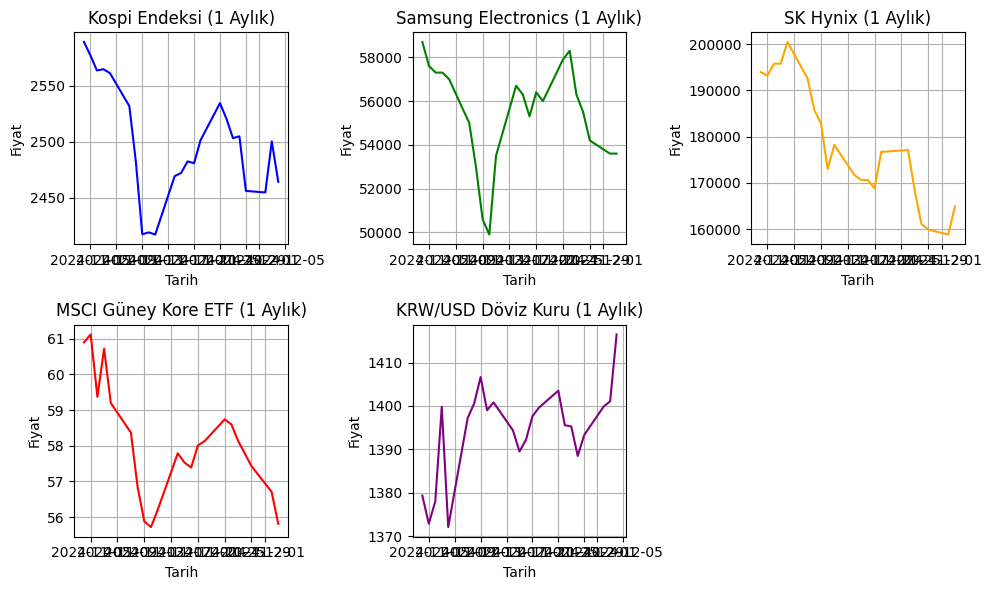

In [57]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 1 Aylık ve Günlük Veri Çekme
companies = ["005930.KQ", "000660.KQ", "EWY", "^KS11", "KRW=X"]  # Samsung, SK Hynix, MSCI Güney Kore, Kospi, KRW/USD

# 1 Aylık Veri
monthly_data = {}
for ticker in companies:
    data = yf.Ticker(ticker).history(period="1mo")  # 1 aylık veri
    monthly_data[ticker] = data

# Bugün ve Dünkü Veri
today_data = {}
for ticker in companies:
    data = yf.Ticker(ticker).history(period="2d")  # Son 2 günlük veri
    today_data[ticker] = data

# Veriyi Yazdırma
for ticker in companies:
    print(f"1 Aylık Veri - {ticker}:")
    print(monthly_data[ticker].tail())  # Son 5 günlük veriyi yazdır
    print(f"Bugün ve Dünkü Veri - {ticker}:")
    print(today_data[ticker].tail())  # Son 2 günün verisini yazdır

# Veriyi Grafikle Gösterme
plt.figure(figsize=(10,6))

# Kospi Endeksi
kospi_data = monthly_data["^KS11"]
plt.subplot(2, 3, 1)
plt.plot(kospi_data.index, kospi_data["Close"], label="Kospi Endeksi", color="blue")
plt.title("Kospi Endeksi (1 Aylık)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.grid(True)

# Samsung Electronics
samsung_data = monthly_data["005930.KQ"]
plt.subplot(2, 3, 2)
plt.plot(samsung_data.index, samsung_data["Close"], label="Samsung Electronics", color="green")
plt.title("Samsung Electronics (1 Aylık)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.grid(True)

# SK Hynix
sk_hynix_data = monthly_data["000660.KQ"]
plt.subplot(2, 3, 3)
plt.plot(sk_hynix_data.index, sk_hynix_data["Close"], label="SK Hynix", color="orange")
plt.title("SK Hynix (1 Aylık)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.grid(True)

# MSCI Güney Kore ETF
msci_korea_data = monthly_data["EWY"]
plt.subplot(2, 3, 4)
plt.plot(msci_korea_data.index, msci_korea_data["Close"], label="MSCI Güney Kore", color="red")
plt.title("MSCI Güney Kore ETF (1 Aylık)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.grid(True)

# KRW/USD Döviz Kuru
krw_usd_data = monthly_data["KRW=X"]
plt.subplot(2, 3, 5)
plt.plot(krw_usd_data.index, krw_usd_data["Close"], label="KRW/USD Döviz Kuru", color="purple")
plt.title("KRW/USD Döviz Kuru (1 Aylık)")
plt.xlabel("Tarih")
plt.ylabel("Fiyat")
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
gkr
